# Template of a SMI jupyter notebook

In [1]:
if True:
    #%matplotlib notebook
    from pyScatt.packages import *
    plt.rcParams.update({'figure.max_open_warning': 0})
    plt.rcParams.update({ 'image.origin': 'lower'   })
    plt.rcParams.update({ 'image.interpolation': 'none'   })
    import re
    T=True
    F=False
    #%matplotlib notebook
    create_ds_args = {'compression': "gzip", 'shuffle': True,  'fletcher32': True}

In [2]:

import sys, os
SciAnalysis_PATH='/home/yuzhang/Repos/SciAnalysis/'
SciAnalysis_PATH in sys.path or sys.path.append(SciAnalysis_PATH)
from SciAnalysis.IO_HDF import dicttoh5, h5todict


In [3]:
import glob
%run -i  /home/group/Software/SciAnalysis/SciAnalysis/XSAnalysis/Protocols.py
%run -i  /home/group/Software/SciAnalysis/SciAnalysis/XSAnalysis/Data.py
%run -i  /home/group/Software/SciAnalysis/SciAnalysis/tools.py



In [4]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Stitch_Scattering.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/IO.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/saxs.py

%run -i /home/yuzhang/Software/pyScatt/pyScatt/plots.py

## Locate the files on your computer

In [5]:
username = 'Dinca' 


inDir = '/home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/%s/HDF_Results/'%( username ) 

outDir0 = '/home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/%s/PostAnalysis/'%( username ) 

outDir = create_fullpath(  outDir0 )

Directory  /home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/Dinca/PostAnalysis/  already exists


## Get the filename list for this user-

In [7]:
t_list = sorted( ls_dir( inDir, and_list=[ username ]) )


print( t_list)


['Dinca_S10_CuHHTT_CsBr_Neg.h5', 'Dinca_S11_NiBHT_Bare.h5', 'Dinca_S1_CuHHTT_Bare.h5', 'Dinca_S2_CuHHTT_TEPBF4_Soaked.h5', 'Dinca_S3_CuHHTT_KNO2_Soaked.h5', 'Dinca_S4_CuHHTT_CsBr_Soaked.h5', 'Dinca_S5_CuHHTT_TEPBF4_Pos.h5', 'Dinca_S6_CuHHTT_KNO2_Pos.h5', 'Dinca_S7_CuHHTT_CsBr_Pos.h5', 'Dinca_S8_CuHHTT_TEPBF4_Neg.h5', 'Dinca_S9_CuHHTT_KNO2_Neg.h5']


In [8]:
t_list = ['Dinca_S1_CuHHTT_Bare.h5', 'Dinca_S2_CuHHTT_TEPBF4_Soaked.h5', 'Dinca_S3_CuHHTT_KNO2_Soaked.h5',
          'Dinca_S4_CuHHTT_CsBr_Soaked.h5', 'Dinca_S5_CuHHTT_TEPBF4_Pos.h5', 'Dinca_S6_CuHHTT_KNO2_Pos.h5',
          'Dinca_S7_CuHHTT_CsBr_Pos.h5', 'Dinca_S8_CuHHTT_TEPBF4_Neg.h5', 'Dinca_S9_CuHHTT_KNO2_Neg.h5',
         'Dinca_S10_CuHHTT_CsBr_Neg.h5', 'Dinca_S11_NiBHT_Bare.h5', ]


In [9]:
print( t_list )

['Dinca_S1_CuHHTT_Bare.h5', 'Dinca_S2_CuHHTT_TEPBF4_Soaked.h5', 'Dinca_S3_CuHHTT_KNO2_Soaked.h5', 'Dinca_S4_CuHHTT_CsBr_Soaked.h5', 'Dinca_S5_CuHHTT_TEPBF4_Pos.h5', 'Dinca_S6_CuHHTT_KNO2_Pos.h5', 'Dinca_S7_CuHHTT_CsBr_Pos.h5', 'Dinca_S8_CuHHTT_TEPBF4_Neg.h5', 'Dinca_S9_CuHHTT_KNO2_Neg.h5', 'Dinca_S10_CuHHTT_CsBr_Neg.h5', 'Dinca_S11_NiBHT_Bare.h5']


In [10]:
%matplotlib inline

## Load, plot h5 files created by WAXS_Analysis pipeline

### Test one data

In [11]:
if False:
    for sam in t_list[:1]:

        print(sam)
        res = h5todict( inDir + sam  )
        d = np.array( res['qmap']['data'], dtype=float)
        qx = res['qmap']['qpar']
        qy = res['qmap']['qver']

        ca = res['circular average']['data']
        q, iq = ca[:,0], ca[:,2]




    #fig, ax = plt.subplots(figsize=[8,4])
    fig,axes=create_fig_ax( H=1,V=2, figsize=[10,4], title=sam,fontsize=12, y=1.08  )  
    ax = axes[0]
    show_imgz(  d, extent=[ qx[0], qx[-1], qy[0], qy[-1]], z_mode_adj = [ 'gamma', .6 ], ztrim=[0.01,0.01],
              image_name = 'waxs scattering pattern',  aspect=1, show_colorbar=True, 
               xlim = [-.2, 3], ylim=[-.2, 3],  #vmin=1, vmax=12e3,
             ax=[fig,ax], cmap = cmap_jet_extended,  center= [0,0],
         xlabel ='$q_{par}(A^{-1})$',  ylabel = '$q_{ver}(A^{-1})$',  ) 

    ax = axes[1]    
    plot1D( x= q, y= iq/3e6, m='D', ls='--', ax=ax, c='k', markersize=3, logy=True, 
           logx=False, legend='', title='circular average', xlabel=r'$Q (\AA^{-1})$', ylabel= r'$Intensity (a.u.)$', )
    xm,ym =  find_max_peak( q, iq, xrange=[0.2, 0.4 ])
    ax.vlines( xm, 0, ym*10, label=r'$Q_1=%.4f\ \AA^{-1}$'%xm   )
    ax.legend(loc = 'best', fontsize= 8 )
    ax.set_xlim([0, 4 ])   
    ax.set_ylim([  1e3, 3e4])    
    plt.tight_layout()   




In [12]:
#%matplotlib notebook

In [13]:
%matplotlib inline

## Plot all data with 2D and 1D - q~Iq

Dinca_S1_CuHHTT_Bare.h5
Dinca_S1_CuHHTT_Bare.h5
Dinca_S2_CuHHTT_TEPBF4_Soaked.h5
Dinca_S2_CuHHTT_TEPBF4_Soaked.h5
Dinca_S3_CuHHTT_KNO2_Soaked.h5
Dinca_S3_CuHHTT_KNO2_Soaked.h5
Dinca_S4_CuHHTT_CsBr_Soaked.h5
Dinca_S4_CuHHTT_CsBr_Soaked.h5
Dinca_S5_CuHHTT_TEPBF4_Pos.h5
Dinca_S5_CuHHTT_TEPBF4_Pos.h5
Dinca_S6_CuHHTT_KNO2_Pos.h5
Dinca_S6_CuHHTT_KNO2_Pos.h5
Dinca_S7_CuHHTT_CsBr_Pos.h5
Dinca_S7_CuHHTT_CsBr_Pos.h5
Dinca_S8_CuHHTT_TEPBF4_Neg.h5
Dinca_S8_CuHHTT_TEPBF4_Neg.h5
Dinca_S9_CuHHTT_KNO2_Neg.h5
Dinca_S9_CuHHTT_KNO2_Neg.h5
Dinca_S10_CuHHTT_CsBr_Neg.h5
Dinca_S10_CuHHTT_CsBr_Neg.h5
Dinca_S11_NiBHT_Bare.h5
Dinca_S11_NiBHT_Bare.h5


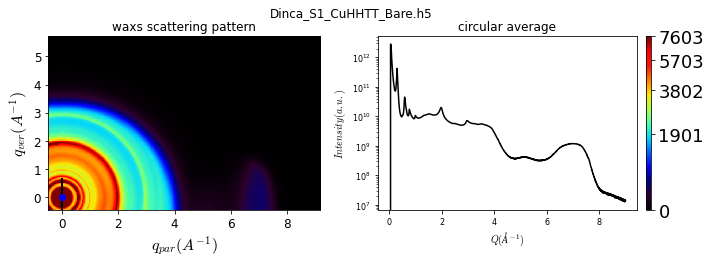

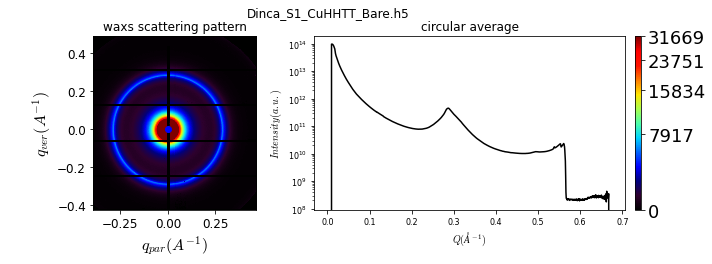

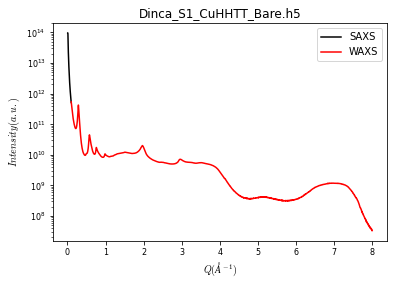

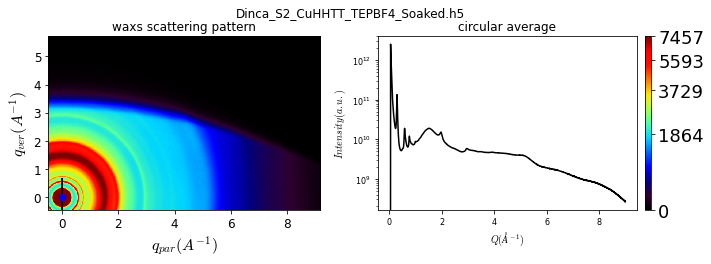

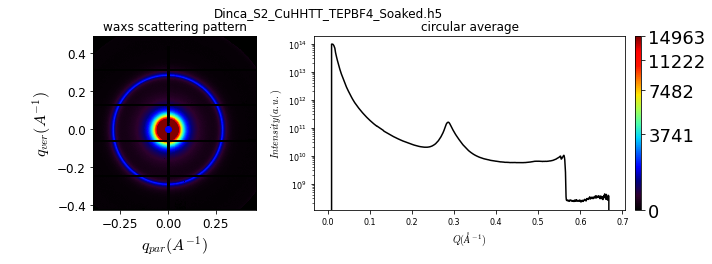

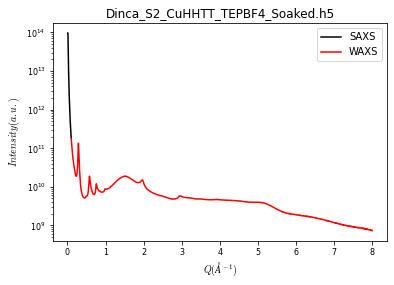

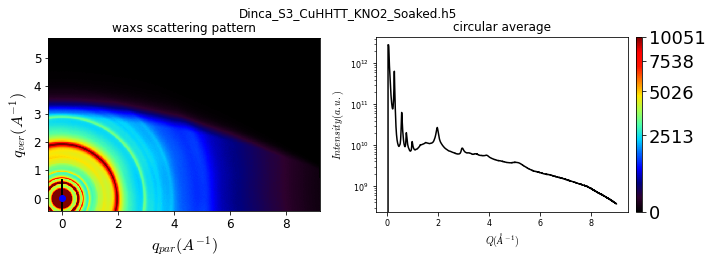

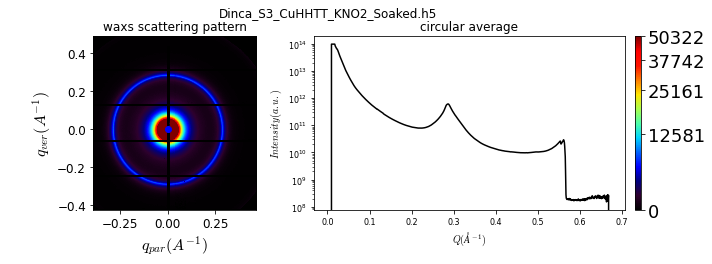

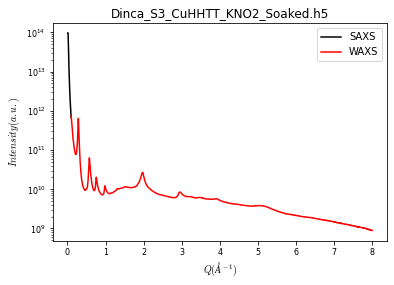

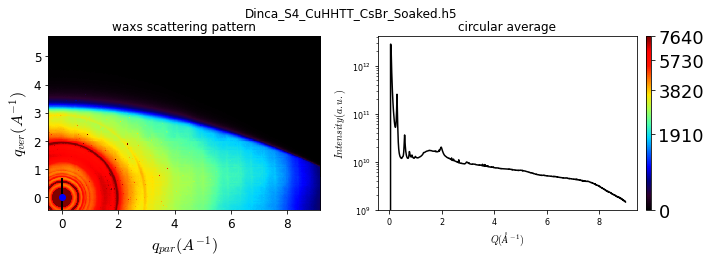

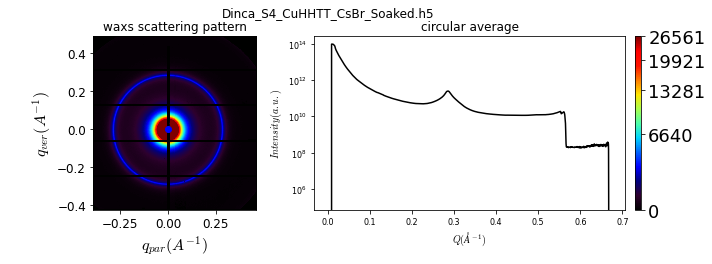

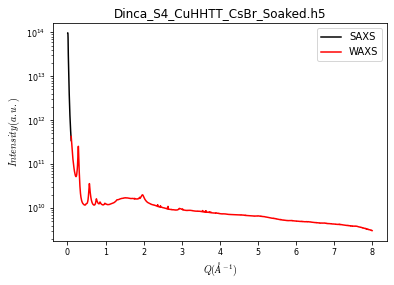

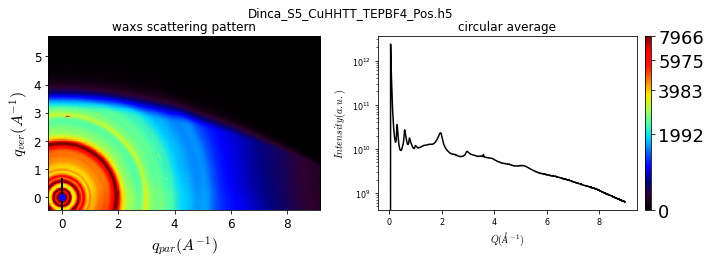

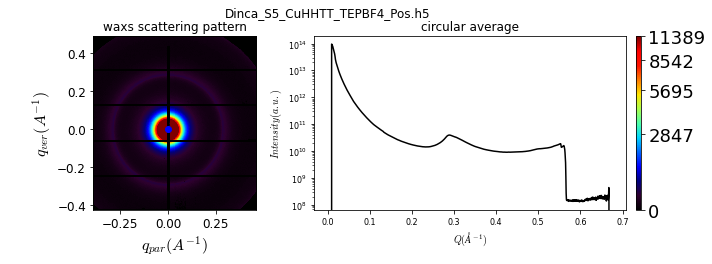

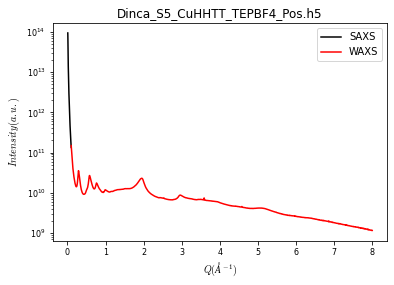

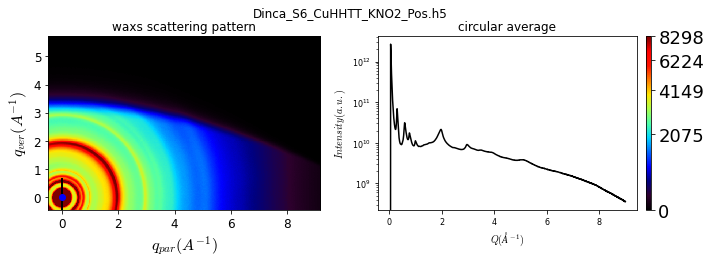

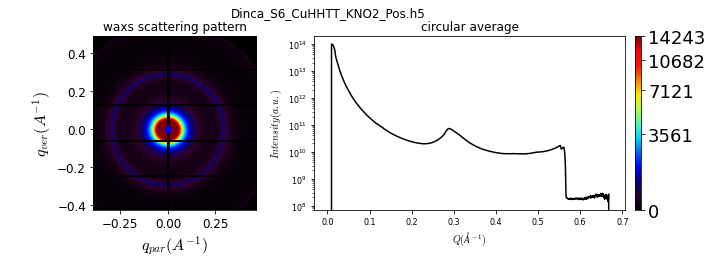

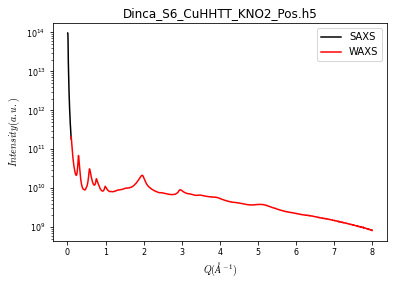

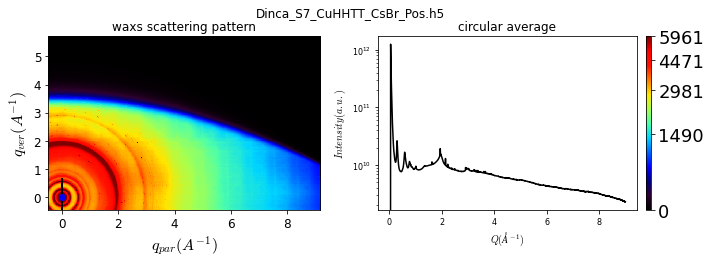

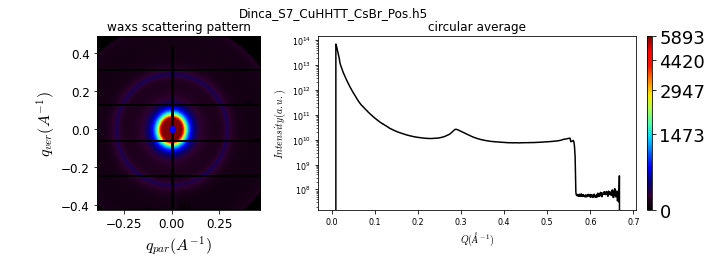

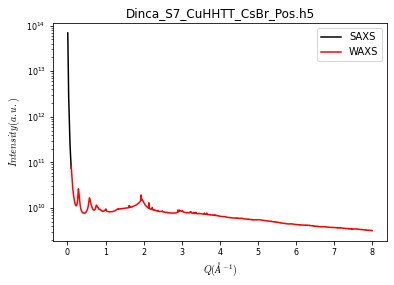

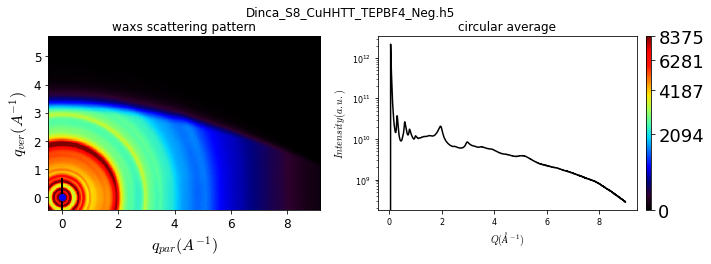

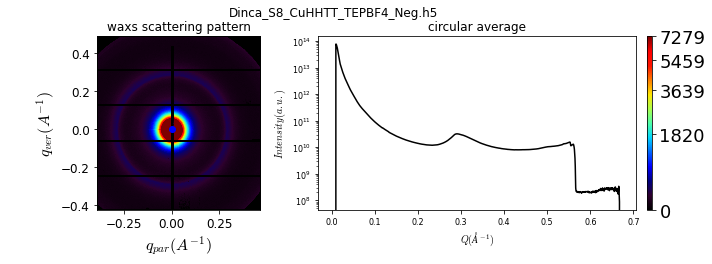

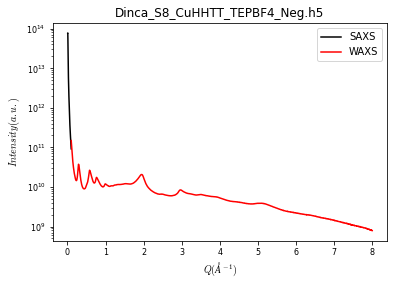

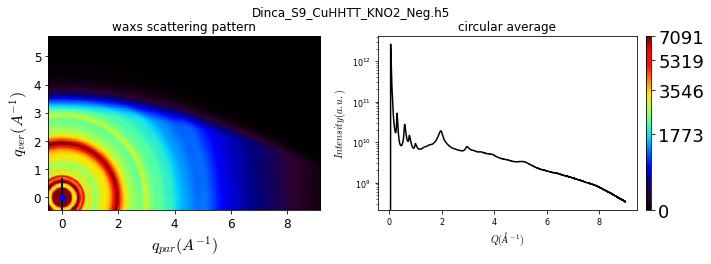

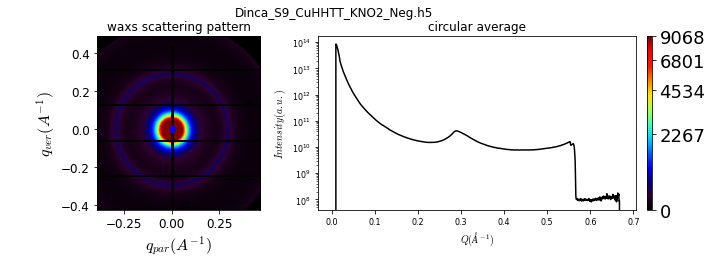

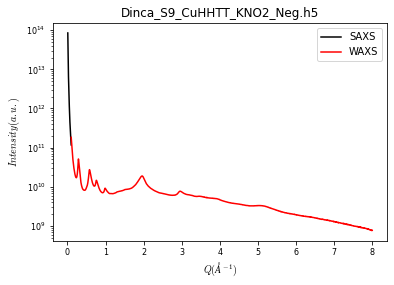

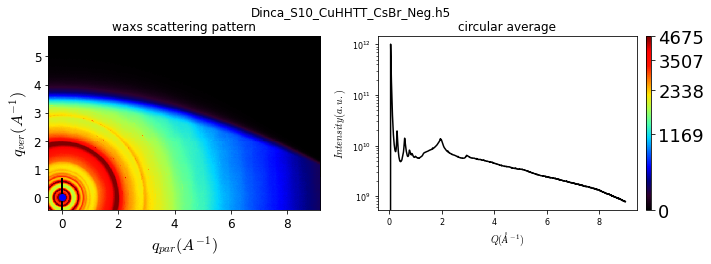

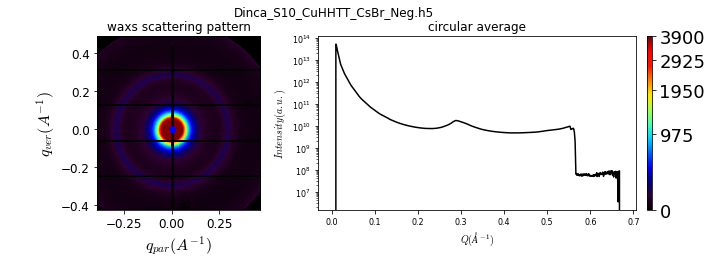

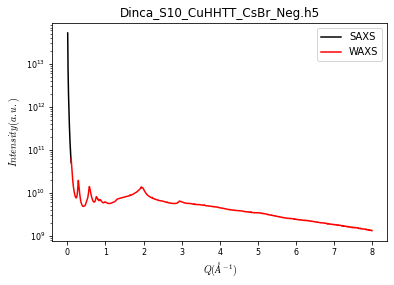

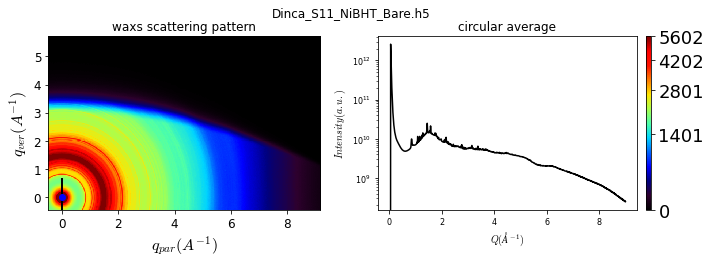

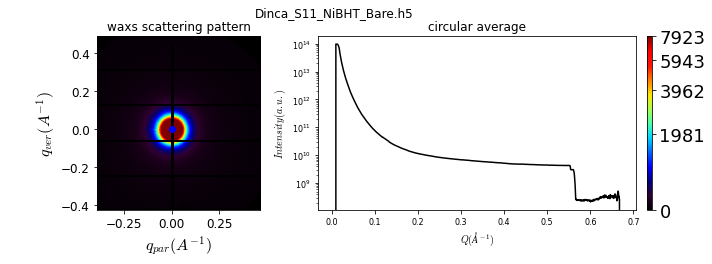

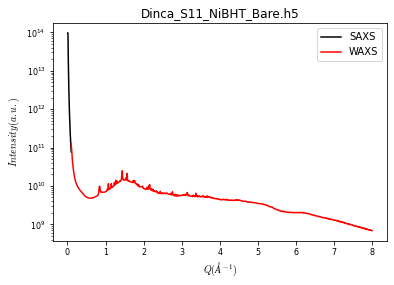

In [15]:
for samk in t_list[:]:    
    print(samk)
    RES = h5todict( inDir + samk  )
    # FOR WAXS
    res = RES['WAXS']
    d = np.array( res['qmap']['data'], dtype=float)
    qx = res['qmap']['qpar']
    qy = res['qmap']['qver']
    
    ca = res['circular average']['data']
    qw, iqw = ca[:,0], ca[:,2]
    
    
    fig,axes=create_fig_ax( H=1,V=2, figsize=[10,4], title=samk,fontsize=12, y=1.08  )  
    ax = axes[0]
    show_imgz(  d, extent=[ qx[0], qx[-1], qy[0], qy[-1]], z_mode_adj = [ 'gamma', .6 ], ztrim=[0.01,0.01],
              image_name = 'waxs scattering pattern',  aspect=1, show_colorbar=True, 
              #xlim = [-.2, 3], ylim=[-.2, 3], 
              
              #vmin=1, vmax=12e3,
             ax=[fig,ax], cmap = cmap_jet_extended,  center= [0,0],
         xlabel ='$q_{par}(A^{-1})$',  ylabel = '$q_{ver}(A^{-1})$',  ) 

    ax = axes[1]    
    plot1D( x= qw, y= iqw, m='', ls='-', ax=ax, c='k', markersize=3, logy=True, 
           logx=False, legend='', title='circular average', xlabel=r'$Q (\AA^{-1})$', ylabel= r'$Intensity (a.u.)$', )
    
    #xm,ym =  find_max_peak( q, iq/3e6, xrange=[0.2, 0.4 ])
    #ax.vlines( xm, 0, ym*10, label=r'$Q_1=%.4f\ \AA^{-1}$'%xm   )
    #ax.legend(loc = 'best', fontsize= 8 )
    
    #ax.set_xlim([0, 4 ])   
    #ax.set_ylim([  1e3, ym*10])
    plt.tight_layout()    
    plt.savefig( outDir + samk[:-3]+'_2D_1D_WAXS.png', dpi = 500)
    

#for samk in t_list[2:3]:    
    print(samk)
    Res = RES['SAXS']    
    for sam in list( Res.keys() ):
        if 'None' in sam:
            res = Res[sam]
            d = np.array( res['qmap']['data'], dtype=float)
            qx = res['qmap']['qpar']
            qy = res['qmap']['qver']

            ca = res['circular average']['data']
            qs, iqs = ca[:,0], ca[:,2]


            fig,axes=create_fig_ax( H=1,V=2, figsize=[10,4], title=samk,fontsize=12, y=1.08  )  
            ax = axes[0]
            show_imgz(  d, extent=[ qx[0], qx[-1], qy[0], qy[-1]], z_mode_adj = [ 'gamma', .6 ], ztrim=[0.01,0.01],
                      image_name = 'waxs scattering pattern',  aspect=1, show_colorbar=True, 
                      #xlim = [-.2, 3], ylim=[-.2, 3], 

                      #vmin=1, vmax=12e3,
                     ax=[fig,ax], cmap = cmap_jet_extended,  center= [0,0],
                 xlabel ='$q_{par}(A^{-1})$',  ylabel = '$q_{ver}(A^{-1})$',  ) 

            ax = axes[1]    
            plot1D( x= qs, y= iqs, m='', ls='-', ax=ax, c='k', markersize=3, logy=True, 
                   logx=False, legend='', title='circular average', xlabel=r'$Q (\AA^{-1})$', ylabel= r'$Intensity (a.u.)$', )

            #xm,ym =  find_max_peak( q, iq/3e6, xrange=[0.2, 0.4 ])
            #ax.vlines( xm, 0, ym*10, label=r'$Q_1=%.4f\ \AA^{-1}$'%xm   )
            #ax.legend(loc = 'best', fontsize= 8 )

            #ax.set_xlim([0, 4 ])   
            #ax.set_ylim([  1e3, ym*10])
            plt.tight_layout()    
            plt.savefig( outDir + samk [:-3]+'_2D_1D_SAXS.png', dpi = 500)

            
    fig, ax = plt.subplots()
    x1,x2=find_index(qs, 0.01), find_index(qs,0.1)
    plot1D( x=qs[x1:x2], y=iqs[x1:x2], m='', c='k', ax=ax, legend='SAXS'  )

    x1,x2=find_index(qw, 0.1), find_index(qw,  8)
    plot1D( x=qw[x1:x2], y=iqw[x1:x2], m='', c='r', ax=ax, logy=True, legend='WAXS', title=samk,
          xlabel=r'$Q (\AA^{-1})$', ylabel= r'$Intensity (a.u.)$', )
    
    plt.savefig( outDir + samk [:-3]+'_1D_SAXS_WAXS.png', dpi = 500)
            

## Plot few curve together

In [19]:
def _plot_multi_waxs( m1, fname = 'S1234' ):
    i = 0
    fig,axes=create_fig_ax( H=1,V=1, figsize=[8,6], title='',fontsize=12, y=1.08  )  
    for sam in t_list:
        flag = False
        for k in m1:
            if k   in sam:
                flag= True
                break
        if flag:
            print(sam)
            res = h5todict( inDir + sam  )['WAXS']    
            ca = res['circular average']['data']
            q, iq = ca[:,0], ca[:,2]  
            iq = iq

            ax = axes[0]   
            plot1D( x= q, y= iq , m= markers[i], ls='', ax=ax, c=colors[i], markersize=3, logy=True, 
                   logx=False,  title='circular average-WAXS', 
                   legend='sam=%s'%sam, fontsize=18, tick_size =18, 
                   xlabel=r'$Q (\AA^{-1})$', ylabel= r'$Intensity (a.u.)$', )
            i += 1
        ax.legend(loc = 'best', fontsize= 14 )
        ax.set_ylabel( r'$Intensity (a.u.)$', fontsize=18)
        ax.set_xlabel( r'$Q (\AA^{-1})$', fontsize=18)

        ax.set_xlim([0.12, 4 ])   
        ax.set_ylim([  1e9,  3e12])    
        plt.tight_layout()  
        plt.savefig( outDir +  fname +'_qIq_WAXS.png', dpi = 500)
        
def _plot_multi_saxs( m1, fname = 'S1234' ):
    i = 0
    fig,axes=create_fig_ax( H=1,V=1, figsize=[8,6], title='',fontsize=12, y=1.08  )  
    for sam in t_list:
        flag = False
        for k in m1:
            if k   in sam:             
                flag= True
                print(sam)
                break

        if flag:
            print(sam)        
            Res = h5todict( inDir + sam  )['SAXS']
            for sami in list( Res.keys() ):
                if 'None' in sami: 
                    res = Res[ sami  ]

                    ca = res['circular average']['data']
                    q, iq = ca[:,0], ca[:,2]  
                    iq = iq 

                    ax = axes[0]   
                    plot1D( x= q, y= iq , m= markers[i], ls='', ax=ax, c=colors[i], markersize=3,
                            logy=True, logx= True, 
                            title='circular average-SAXS', 
                           legend='sam=%s'%sam, fontsize=18, tick_size =18, 
                           xlabel=r'$Q (\AA^{-1})$', ylabel= r'$Intensity (a.u.)$', )
                    i += 1
    ax.legend(loc = 'best', fontsize= 14 )
    ax.set_ylabel( r'$Intensity (a.u.)$', fontsize=18)
    ax.set_xlabel( r'$Q (\AA^{-1})$', fontsize=18)

    #ax.set_xlim([0.12, 4 ])   
    ax.set_ylim([  1e9,  3e14])    
    plt.tight_layout()  
    plt.savefig( outDir +  fname +'_qIq_SAXS.png', dpi = 500)
        
        
                
        

/home/yuzhang/Software/pyScatt/pyScatt/plots.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.setp(ax1.get_xticklabels(), visible=False)


Dinca_S1_CuHHTT_Bare.h5
Dinca_S2_CuHHTT_TEPBF4_Soaked.h5
Dinca_S3_CuHHTT_KNO2_Soaked.h5
Dinca_S4_CuHHTT_CsBr_Soaked.h5


/home/yuzhang/Software/pyScatt/pyScatt/plots.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.setp(ax1.get_xticklabels(), visible=False)


Dinca_S1_CuHHTT_Bare.h5
Dinca_S1_CuHHTT_Bare.h5
Dinca_S2_CuHHTT_TEPBF4_Soaked.h5
Dinca_S2_CuHHTT_TEPBF4_Soaked.h5
Dinca_S3_CuHHTT_KNO2_Soaked.h5
Dinca_S3_CuHHTT_KNO2_Soaked.h5
Dinca_S4_CuHHTT_CsBr_Soaked.h5
Dinca_S4_CuHHTT_CsBr_Soaked.h5


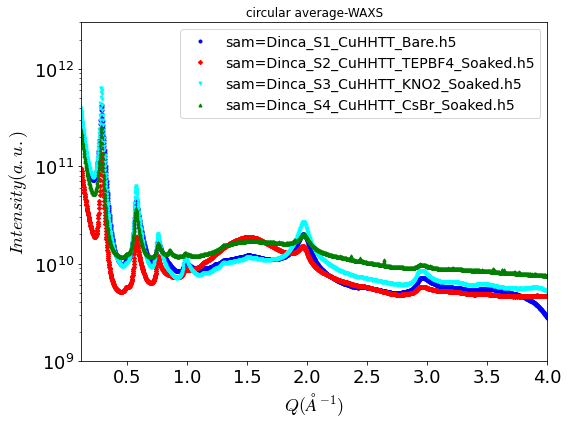

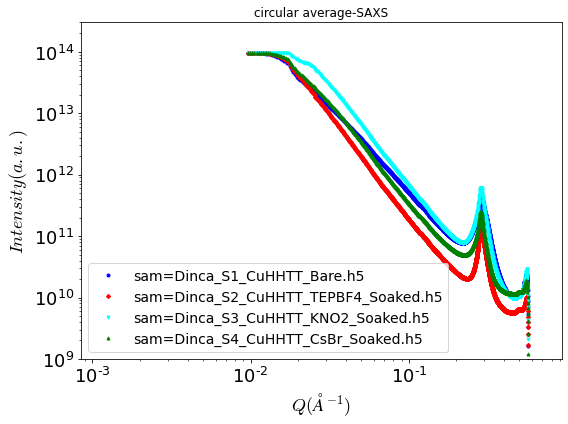

In [21]:
m1 = ['S1_', 'S2_', 'S3_', 'S4_']
_plot_multi_waxs( m1, fname = 'S1234' )
_plot_multi_saxs( m1, fname = 'S1234' )

/home/yuzhang/Software/pyScatt/pyScatt/plots.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.setp(ax1.get_xticklabels(), visible=False)


Dinca_S1_CuHHTT_Bare.h5
Dinca_S5_CuHHTT_TEPBF4_Pos.h5
Dinca_S6_CuHHTT_KNO2_Pos.h5
Dinca_S7_CuHHTT_CsBr_Pos.h5


/home/yuzhang/Software/pyScatt/pyScatt/plots.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.setp(ax1.get_xticklabels(), visible=False)


Dinca_S1_CuHHTT_Bare.h5
Dinca_S1_CuHHTT_Bare.h5
Dinca_S5_CuHHTT_TEPBF4_Pos.h5
Dinca_S5_CuHHTT_TEPBF4_Pos.h5
Dinca_S6_CuHHTT_KNO2_Pos.h5
Dinca_S6_CuHHTT_KNO2_Pos.h5
Dinca_S7_CuHHTT_CsBr_Pos.h5
Dinca_S7_CuHHTT_CsBr_Pos.h5


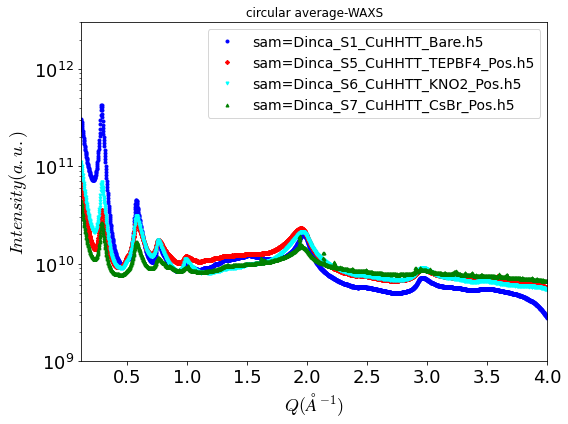

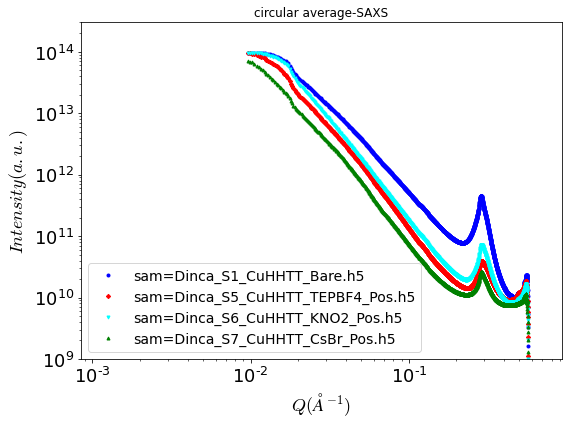

In [22]:
m1 = ['S1_', 'S5_', 'S6_', 'S7_']
fname = 'S1567'
_plot_multi_waxs( m1, fname = fname )
_plot_multi_saxs( m1, fname = fname )

/home/yuzhang/Software/pyScatt/pyScatt/plots.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.setp(ax1.get_xticklabels(), visible=False)


Dinca_S1_CuHHTT_Bare.h5
Dinca_S8_CuHHTT_TEPBF4_Neg.h5
Dinca_S9_CuHHTT_KNO2_Neg.h5
Dinca_S10_CuHHTT_CsBr_Neg.h5


/home/yuzhang/Software/pyScatt/pyScatt/plots.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.setp(ax1.get_xticklabels(), visible=False)


Dinca_S1_CuHHTT_Bare.h5
Dinca_S1_CuHHTT_Bare.h5
Dinca_S8_CuHHTT_TEPBF4_Neg.h5
Dinca_S8_CuHHTT_TEPBF4_Neg.h5
Dinca_S9_CuHHTT_KNO2_Neg.h5
Dinca_S9_CuHHTT_KNO2_Neg.h5
Dinca_S10_CuHHTT_CsBr_Neg.h5
Dinca_S10_CuHHTT_CsBr_Neg.h5


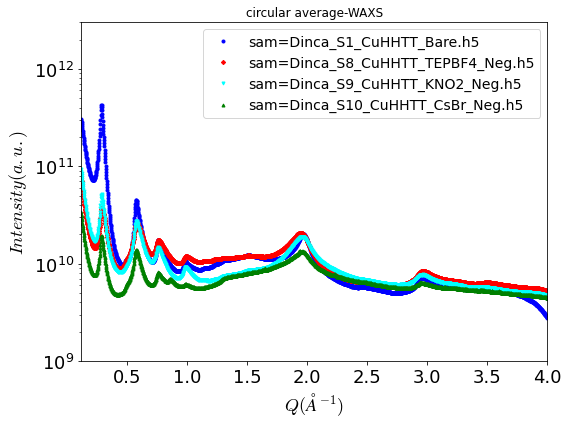

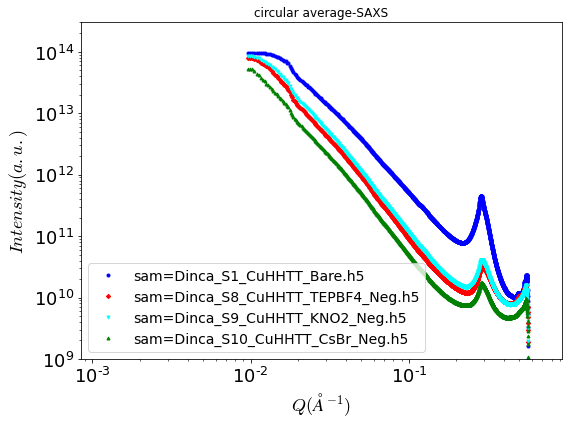

In [23]:
m1 = ['S1_', 'S8_', 'S9_', 'S10_']
fname = 'S18910'
_plot_multi_waxs( m1, fname = fname )
_plot_multi_saxs( m1, fname = fname )



## Calculate the phase peask

In [24]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/users_temp.py

<Figure size 432x288 with 0 Axes>

/home/yuzhang/Software/pyScatt/pyScatt/users_temp.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Dinca_S2_CuHHTT_TEPBF4_Soaked.h5
0.28890003443956375 3.5027267657040606 25.11317615801329


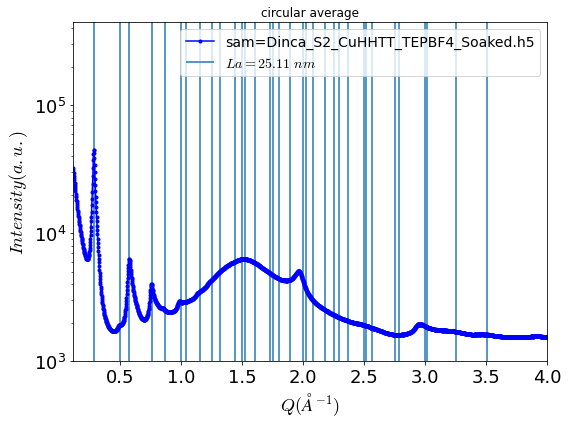

In [25]:
i = 0
fig,axes=create_fig_ax( H=1,V=1, figsize=[8,6], title='',fontsize=12, y=1.08  )  

for sam in t_list[1:2]:    
    print(sam)
    res = h5todict( inDir + sam  )['WAXS']    
    ca = res['circular average']['data']
    q, iq = ca[:,0], ca[:,2]  
    iq = iq / 3e6
    ax = axes[0]   
    plot1D( x= q, y= iq , m= markers[i], ls='-', ax=ax, c=colors[i], markersize=3, logy=True, 
           logx=False,  title='circular average', 
           legend='sam=%s'%sam, fontsize=18, tick_size =18, 
           xlabel=r'$Q (\AA^{-1})$', ylabel= r'$Intensity (a.u.)$', )
    
    xm,ym =  find_max_peak( q, iq , xrange=[0.2, 0.4 ])
    La = get_La( xm )
    qs = get_2dhx_qs( m = 8, a = La )
    print(qs[0], qs[-1], La)
    
    ax.set_xlim([0.12, 4 ])   
    ax.set_ylim([  1e3, ym*10])
    if i ==0:
        ax.vlines( qs, 0, ym*10 , label=r'$La=%.2f\ nm$'%(La)   )
    ax.legend(loc = 'best', fontsize= 14 )
    ax.set_ylabel( r'$Intensity (a.u.)$', fontsize=18)
    ax.set_xlabel( r'$Q (\AA^{-1})$', fontsize=18)
    i += 1
    plt.tight_layout()    
    
    
    #plt.savefig( outDir + sam [:-3]+'_2D_1D.png')

In [26]:
xm

0.2889000344395638

In [27]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Curve_Fit.py

<Figure size 432x288 with 0 Axes>

## Fit the first q of iq

In [39]:
for sam in t_list:    
    print(sam)
    h5_fp = inDir + sam 
    res = h5todict( inDir + sam  )['WAXS']    
    ca = res['circular average']['data']
    q, iq = ca[:,0], ca[:,2]  
    iq = iq    
    if 'S11' not in sam:
        xrange=[  0.2, 0.4 ]
    else:
        xrange=[  0.8, 0.9 ]
    print(xrange)    
    p, pe, xf, yf, R2 = fit_xydata_with_one_peak( q, iq, xrange=xrange, fitw = 0.05, 
                                                 fit_twice=True, fitw_scale= 2 )
    
    
    La = get_La( p[1] )
    cor = abs( 2*np.pi/p[2] )
    
    
    RES,Res= {} , {}
    Res['fit_paras'] = p 
    Res['fit_paras_error'] = pe
    Res['fit_xf'] = xf
    Res['fit_yf'] = yf
    Res['fit_R2'] = R2
    Res['data_x'] = q
    Res['data_y'] = iq
    Res['La'] = La
    Res['domain_size'] = cor
    RES['q1_analysis'] = Res
    
    print('The fitting R2 for sam:%s is: %.3f.'%(sam, R2 ))
    dicttoh5( RES,  h5_fp, h5path='/Analysis/', mode='a',overwrite_data=True)


Dinca_S1_CuHHTT_Bare.h5
[0.2, 0.4]
The fitting R2 for sam:Dinca_S1_CuHHTT_Bare.h5 is: 0.990.
Dinca_S2_CuHHTT_TEPBF4_Soaked.h5
[0.2, 0.4]
The fitting R2 for sam:Dinca_S2_CuHHTT_TEPBF4_Soaked.h5 is: 0.997.
Dinca_S3_CuHHTT_KNO2_Soaked.h5
[0.2, 0.4]
The fitting R2 for sam:Dinca_S3_CuHHTT_KNO2_Soaked.h5 is: 0.996.
Dinca_S4_CuHHTT_CsBr_Soaked.h5
[0.2, 0.4]
The fitting R2 for sam:Dinca_S4_CuHHTT_CsBr_Soaked.h5 is: 0.977.
Dinca_S5_CuHHTT_TEPBF4_Pos.h5
[0.2, 0.4]
The fitting R2 for sam:Dinca_S5_CuHHTT_TEPBF4_Pos.h5 is: 0.921.
Dinca_S6_CuHHTT_KNO2_Pos.h5
[0.2, 0.4]
The fitting R2 for sam:Dinca_S6_CuHHTT_KNO2_Pos.h5 is: 0.979.
Dinca_S7_CuHHTT_CsBr_Pos.h5
[0.2, 0.4]
The fitting R2 for sam:Dinca_S7_CuHHTT_CsBr_Pos.h5 is: 0.985.
Dinca_S8_CuHHTT_TEPBF4_Neg.h5
[0.2, 0.4]
The fitting R2 for sam:Dinca_S8_CuHHTT_TEPBF4_Neg.h5 is: 0.887.
Dinca_S9_CuHHTT_KNO2_Neg.h5
[0.2, 0.4]
The fitting R2 for sam:Dinca_S9_CuHHTT_KNO2_Neg.h5 is: 0.980.
Dinca_S10_CuHHTT_CsBr_Neg.h5
[0.2, 0.4]
The fitting R2 for sam:Dinca_

## Plot the data with fit

/home/yuzhang/Software/pyScatt/pyScatt/Curve_Fit.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Dinca_S1_CuHHTT_Bare.h5


/home/yuzhang/Software/pyScatt/pyScatt/Curve_Fit.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Dinca_S2_CuHHTT_TEPBF4_Soaked.h5


/home/yuzhang/Software/pyScatt/pyScatt/Curve_Fit.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Dinca_S3_CuHHTT_KNO2_Soaked.h5


/home/yuzhang/Software/pyScatt/pyScatt/Curve_Fit.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Dinca_S4_CuHHTT_CsBr_Soaked.h5


/home/yuzhang/Software/pyScatt/pyScatt/Curve_Fit.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Dinca_S5_CuHHTT_TEPBF4_Pos.h5


/home/yuzhang/Software/pyScatt/pyScatt/Curve_Fit.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Dinca_S6_CuHHTT_KNO2_Pos.h5


/home/yuzhang/Software/pyScatt/pyScatt/Curve_Fit.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Dinca_S7_CuHHTT_CsBr_Pos.h5


/home/yuzhang/Software/pyScatt/pyScatt/Curve_Fit.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Dinca_S8_CuHHTT_TEPBF4_Neg.h5


/home/yuzhang/Software/pyScatt/pyScatt/Curve_Fit.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Dinca_S9_CuHHTT_KNO2_Neg.h5


/home/yuzhang/Software/pyScatt/pyScatt/Curve_Fit.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Dinca_S10_CuHHTT_CsBr_Neg.h5


/home/yuzhang/Software/pyScatt/pyScatt/Curve_Fit.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Dinca_S11_NiBHT_Bare.h5


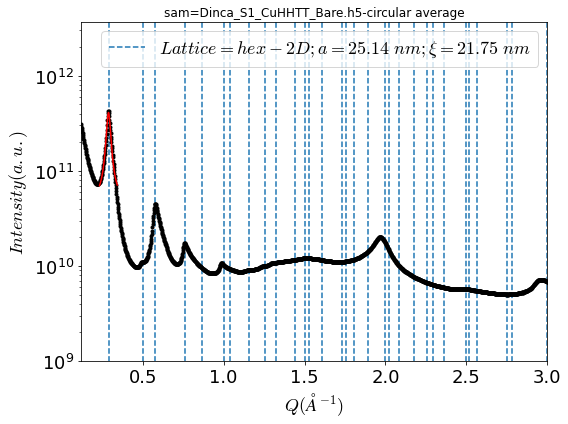

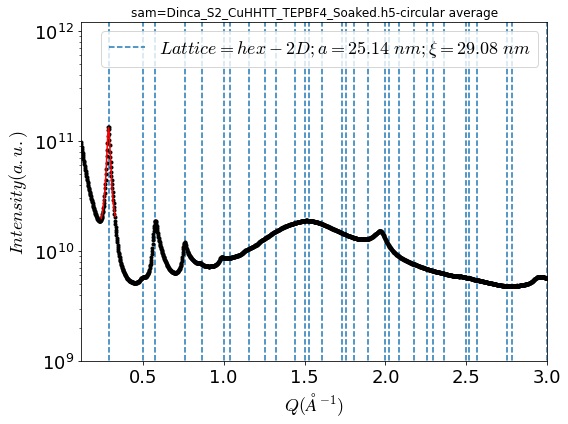

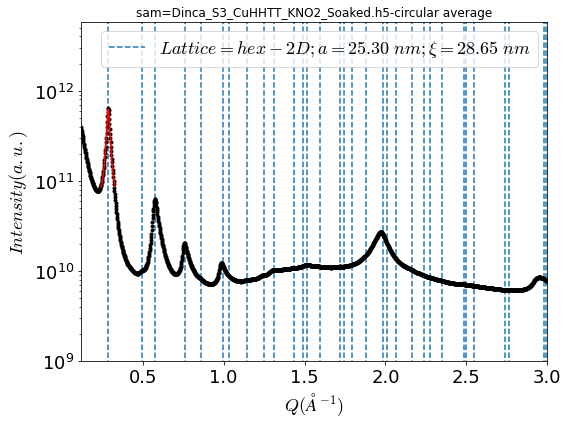

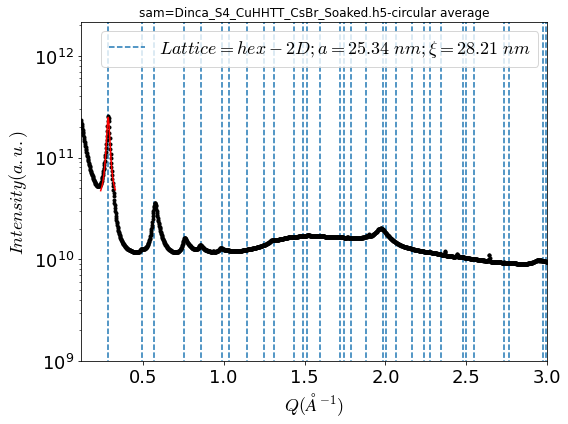

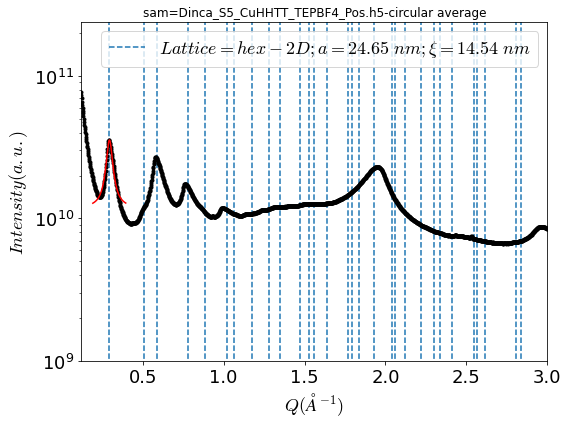

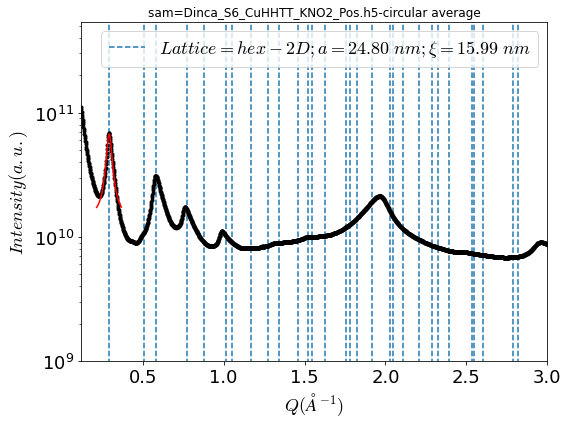

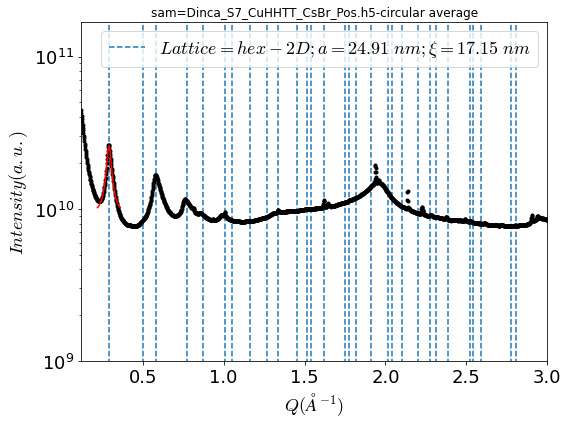

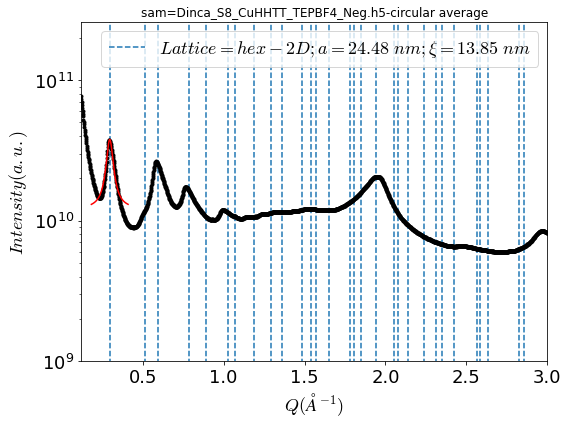

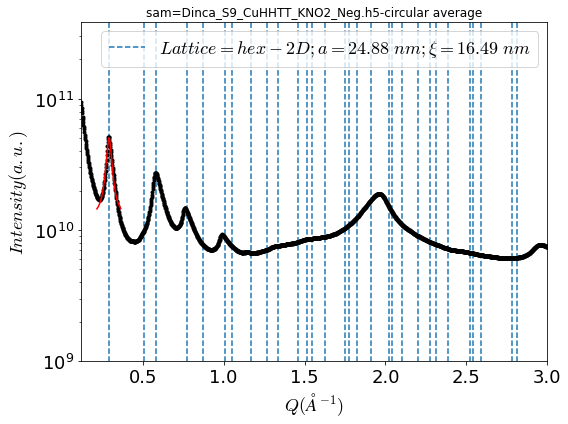

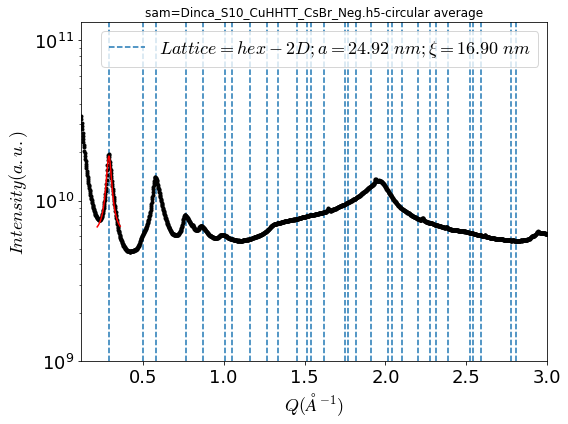

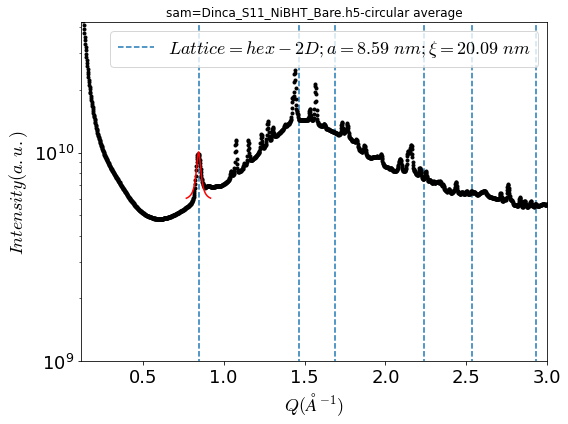

In [43]:
i = 0
for sam in t_list[:]:    
    fig,axes=create_fig_ax( H=1,V=1, figsize=[8,6], title='',fontsize=12, y=1.08  )  
    print(sam)
    Res = h5todict( inDir + sam  )
    res = Res['Analysis']['q1_analysis'] 
    (q,iq, p, pe, xf,yf,R2) = ( res['data_x'], res['data_y'],  res['fit_paras'],
                                res['fit_paras_error'],res['fit_xf'],res['fit_yf'],  res['fit_R2'] )

    ax = axes[0]    
      
    
    plot1D( x= q, y= iq , m= markers[i], ls='', ax=ax, c='k', markersize=3, logy=True, 
           logx=False,  title='circular average', 
           legend='', 
           fontsize=18, tick_size =18, 
           xlabel=r'$Q (\AA^{-1})$', ylabel= r'$Intensity (a.u.)$', )   
    
    plot1D( x= xf, y= yf , m= '', ls='-', ax=ax, c='r', markersize=3, logy=True, 
           logx=False,  title='sam=%s-circular average'%sam,  
           legend='', fontsize=18, tick_size =18, 
           xlabel=r'$Q (\AA^{-1})$', ylabel= r'$Intensity (a.u.)$', )   
 
    La = get_La( p[1] )
    qs = get_2dhx_qs( m = 8, a = La )
    ym = p[0]
    cor = abs(2*np.pi/p[2]/10)
    ax.set_xlim([0.12, 3 ])   
    ax.set_ylim([  1e9, ym*10])
    if i ==0:
        ax.vlines( qs, 0, ym*10 , label=r'$Lattice=hex-2D;a=%.2f\ nm;\xi=%.2f\ nm$'%(La, cor) , linestyle='--'  )
        # label=r'$Lattice=hex-2D;a=%.2f\ nm$'%(La) 
    ax.legend(loc = 'best', fontsize= 18 )
    ax.set_ylabel( r'$Intensity (a.u.)$', fontsize=18)
    ax.set_xlabel( r'$Q (\AA^{-1})$', fontsize=18)
    #i += 1
    plt.tight_layout()   
    
    plt.savefig( outDir + sam [:-3]+'_Fit_qIq.png', dpi = 500)
    
    

## Plot lattice parameters

In [44]:
t_list

['Dinca_S1_CuHHTT_Bare.h5',
 'Dinca_S2_CuHHTT_TEPBF4_Soaked.h5',
 'Dinca_S3_CuHHTT_KNO2_Soaked.h5',
 'Dinca_S4_CuHHTT_CsBr_Soaked.h5',
 'Dinca_S5_CuHHTT_TEPBF4_Pos.h5',
 'Dinca_S6_CuHHTT_KNO2_Pos.h5',
 'Dinca_S7_CuHHTT_CsBr_Pos.h5',
 'Dinca_S8_CuHHTT_TEPBF4_Neg.h5',
 'Dinca_S9_CuHHTT_KNO2_Neg.h5',
 'Dinca_S10_CuHHTT_CsBr_Neg.h5',
 'Dinca_S11_NiBHT_Bare.h5']

In [45]:
las = []
cors = []
for sam in t_list[:10]:         
    print(sam)
    Res = h5todict( inDir + sam  )
    res = Res['Analysis']['q1_analysis']     
     
    la, cor = res['La'], res['domain_size'] 
    las.append( la )
    cors.append( cor )
las = np.array( las )    
cors = np.array( cors )      

Dinca_S1_CuHHTT_Bare.h5
Dinca_S2_CuHHTT_TEPBF4_Soaked.h5
Dinca_S3_CuHHTT_KNO2_Soaked.h5
Dinca_S4_CuHHTT_CsBr_Soaked.h5
Dinca_S5_CuHHTT_TEPBF4_Pos.h5
Dinca_S6_CuHHTT_KNO2_Pos.h5
Dinca_S7_CuHHTT_CsBr_Pos.h5
Dinca_S8_CuHHTT_TEPBF4_Neg.h5
Dinca_S9_CuHHTT_KNO2_Neg.h5
Dinca_S10_CuHHTT_CsBr_Neg.h5


In [46]:
Sams = ['S%i'%i for i in range(1,11)]
print( Sams)

['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10']


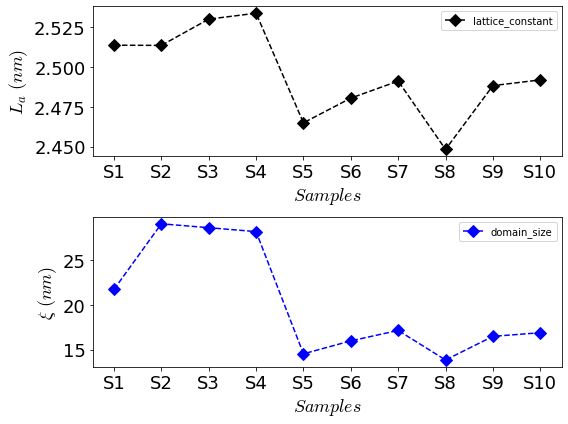

In [47]:
fig,axes=create_fig_ax( H=2,V=1, figsize=[8,6], title='',fontsize=12, y=1.08  )  

ax = axes[0]
plot1D( x= Sams, y= las/10 , m= 'D', ls='--', ax=ax, c='k', markersize=8, logy=False, 
           logx=False,  title='',  legend='lattice_constant', 
           fontsize=18, tick_size =18, )          
ax.set_ylabel( r'$L_a\ (nm)$', fontsize=18)
ax.set_xlabel(  r'$Samples$', fontsize=18)
    
ax = axes[1]
plot1D( x= Sams, y= cors/10 , m= 'D', ls='--', ax=ax, c='b', markersize=8, logy=False, 
           logx=False,  title='',  legend='domain_size', 
           fontsize=18, tick_size =18, )          
ax.set_ylabel( r'$\xi\ (nm)$', fontsize=18)
ax.set_xlabel(  r'$Samples$', fontsize=18)

plt.tight_layout()
plt.savefig( outDir +  'La_DomSize_S1-S10.png', dpi = 500)
    